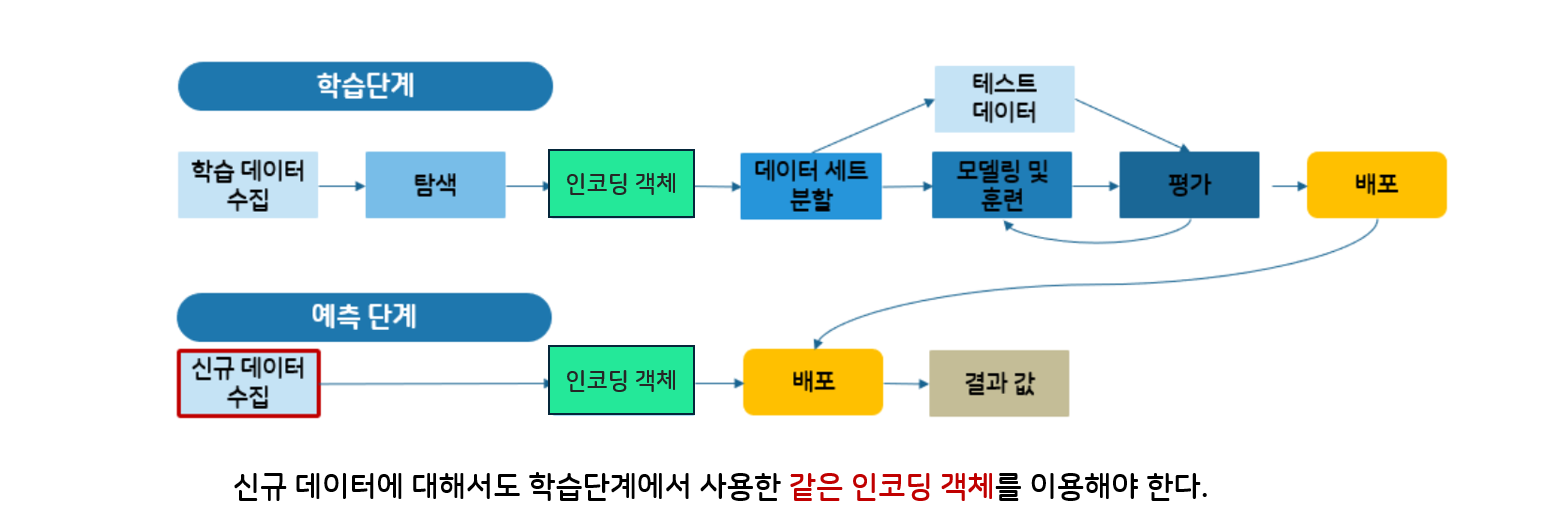

In [1]:
import pandas as pd
train_df = pd.read_csv('./data/train_pre.csv')   # 1차 가공완료 버전이어야 함
test_df = pd.read_csv('./data/test.csv')

In [2]:
train_df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [3]:
y_train_df = train_df['가격']
y_test_df = test_df['가격']

x_train_df = train_df.drop(['가격'], axis=1)
x_test_df = test_df.drop(['가격'], axis=1)

In [4]:
x_train_df.shape, x_test_df.shape

((70, 10), (31, 10))

In [5]:
y_train_df.shape, y_test_df.shape

((70,), (31,))

```
데이터 분할 후 shape 꼭 확인하기
```

In [10]:
# 인코딩 적용 후 데이터 상태 확인

x_train.shape, x_test.shape

((70, 16), (31, 16))

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test_df, y_predict):
    MSE = mean_squared_error(y_test_df,y_predict,squared=True)
    RMSE = mean_squared_error(y_test_df,y_predict,squared=False)
    MAE = mean_absolute_error(y_test_df,y_predict)
    R2 = r2_score(y_test_df,y_predict)
    
    print(f'MSE: {MSE:.3f}, RMSE: {RMSE:.3F}, MAE: {MAE:.3F}, R^2: {R2:.3F}')

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드
train_df = pd.read_csv('./data/train_pre.csv')   # 1차 가공완료 버전이어야 함
test_df = pd.read_csv('./data/test.csv')


##########데이터 분석

##########데이터 전처리

##데이터 분할 (분할 후 shape 꼭 확인)
# x_data = df.drop(['label'], axis=1)
# y_data = df['label']

y_train_df = train_df['가격']
y_test_df = test_df['가격']

x_train_df = train_df.drop(['가격'], axis=1)
x_test_df = test_df.drop(['가격'], axis=1)


########### 인코딩
transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']),
    remainder='passthrough')

transformer.fit(x_train_df)

x_train = transformer.transform(x_train_df) #트랜스포머의 transform() 함수는 결과를 넘파이 배열로 리턴
x_test = transformer.transform(x_test_df)   #테스트는 fit 없이 transform 만 진행

##--------------------전처리 끝----------------------------------------------------------------------

##########모델 생성

model = LinearRegression()

# ##########모델 학습

model.fit(x_train, y_train_df)

# ##########모델 검증

print(f'훈련_R2: {model.score(x_train, y_train_df)}') 
print(f'테스트_R2: {model.score(x_test, y_test_df)}') 


# 모델 평가 (회귀 평가 지표 출력)
y_predict = model.predict(x_test)
evaluate_reg_all(y_test_df, y_predict) 


훈련_R2: 0.8849618214729721
테스트_R2: 0.7746849250515435
MSE: 1397856.930, RMSE: 1182.310, MAE: 570.120, R^2: 0.775


In [35]:
##########모델 예측

# 데이터수집
x_real = [
    [2015, '대형', 6.8, 159, 23, 'LPG', 0,2359, 1935, '수동']
]
x_real_df = pd.DataFrame(x_real, columns=['년식', '종류', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기'])


# 인코딩(transform)
x_real_en = transformer.transform(x_real_df)


# 예측값 출력
y_real_predict = model.predict(x_real_en)

print(f'예측값 : {y_real_predict[0]}')

예측값 : 1796.2824454478978


In [22]:
x_real_df

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,대형,6.8,159,23,LPG,0,2359,1935,수동


In [33]:
x_real_df.shape

(1, 10)

In [31]:
x_real_en

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.015e+03, 6.800e+00, 1.590e+02,
        2.300e+01, 0.000e+00, 2.359e+03, 1.935e+03]])

In [32]:
x_real_en.shape

(1, 16)